In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

path = "archive/heart.csv"
x = lambda a : pd.read_csv(a)

loaded_data = x(path)

In [5]:
loaded_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


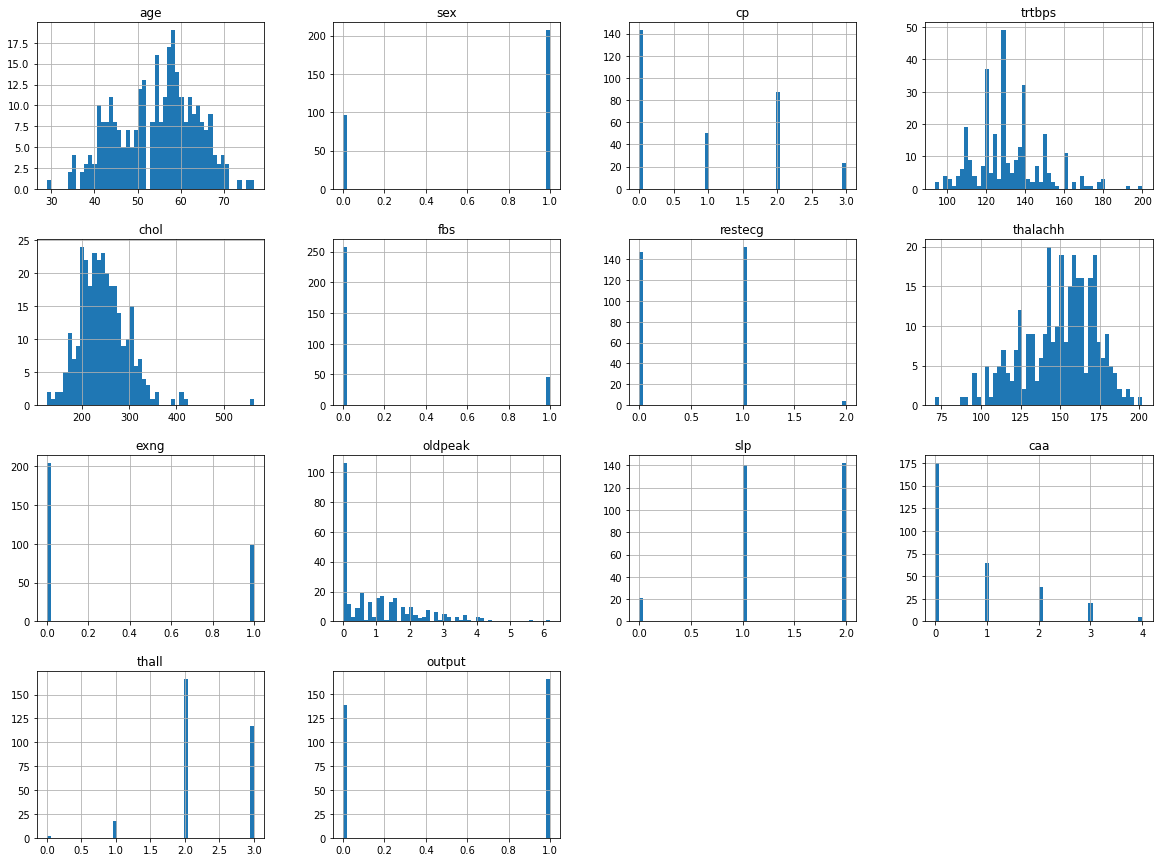

In [12]:
loaded_data.hist(bins=50, figsize=(20,15))

plt.show()

In [13]:
plt.savefig("assets/images/test.png")

<Figure size 432x288 with 0 Axes>

In [15]:
k = loaded_data["age"].head()
k

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [20]:
median = sum(k)/len(k)
median

50.8

In [21]:
loaded_data.shape

(303, 14)

In [24]:
#split data into trainingset and testset
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(loaded_data, test_size = 0.2, random_state=42)

In [25]:
len(train_set), len(test_set)

(242, 61)

In [28]:
train_set.shape, test_set.shape

((242, 14), (61, 14))

<AxesSubplot:xlabel='age', ylabel='chol'>

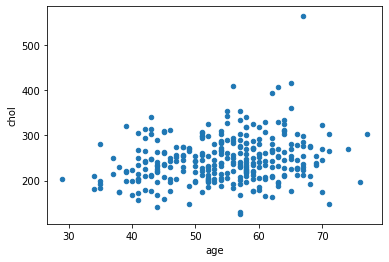

In [29]:
#plot age over choles
loaded_data.plot(kind="scatter", x="age",y="chol")

<AxesSubplot:xlabel='age', ylabel='chol'>

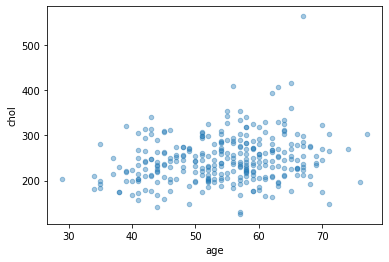

In [34]:
loaded_data.plot(kind="scatter", x="age",y="chol", alpha=0.4)

In [35]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>,
        <AxesSubplot:xlabel='thalachh', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>],
       [<AxesSubplot:xlabel='age', ylabel='thalachh'>,
        <AxesSubplot:xlabel='trtbps', ylabel='thalachh'>,
        <AxesSubplot:xlabel='thalachh', ylabel='thalachh'>,
        <AxesSubplot:xlabel='chol', ylabel='thalachh'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trtbps', ylabel='chol'>,
        <AxesSubplot:xlabel='thalachh', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>]], dtype=object)

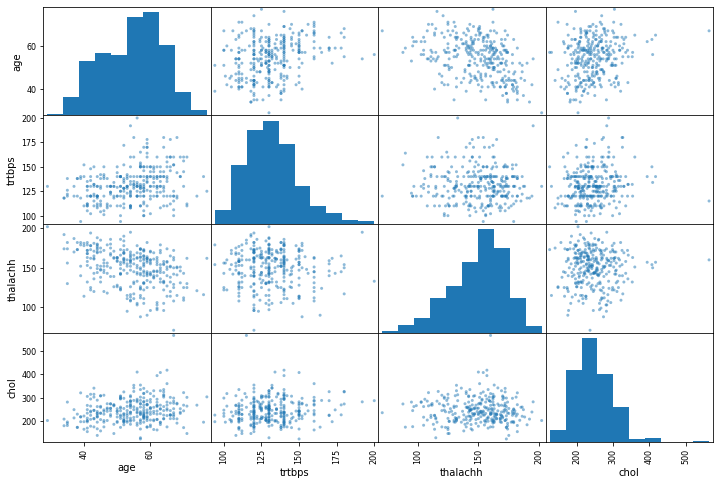

In [38]:
attributes = ["age", "trtbps", "thalachh","chol"]
scatter_matrix(loaded_data[attributes],figsize=(12,8))

In [39]:
#correlation matrix
corr_matrix = loaded_data.corr()

In [41]:
corr_matrix["age"].sort_values(ascending=False)

age         1.000000
trtbps      0.279351
caa         0.276326
chol        0.213678
oldpeak     0.210013
fbs         0.121308
exng        0.096801
thall       0.068001
cp         -0.068653
sex        -0.098447
restecg    -0.116211
slp        -0.168814
output     -0.225439
thalachh   -0.398522
Name: age, dtype: float64